In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Churn_Modelling.csv', encoding='latin1')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().any()

False

In [8]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


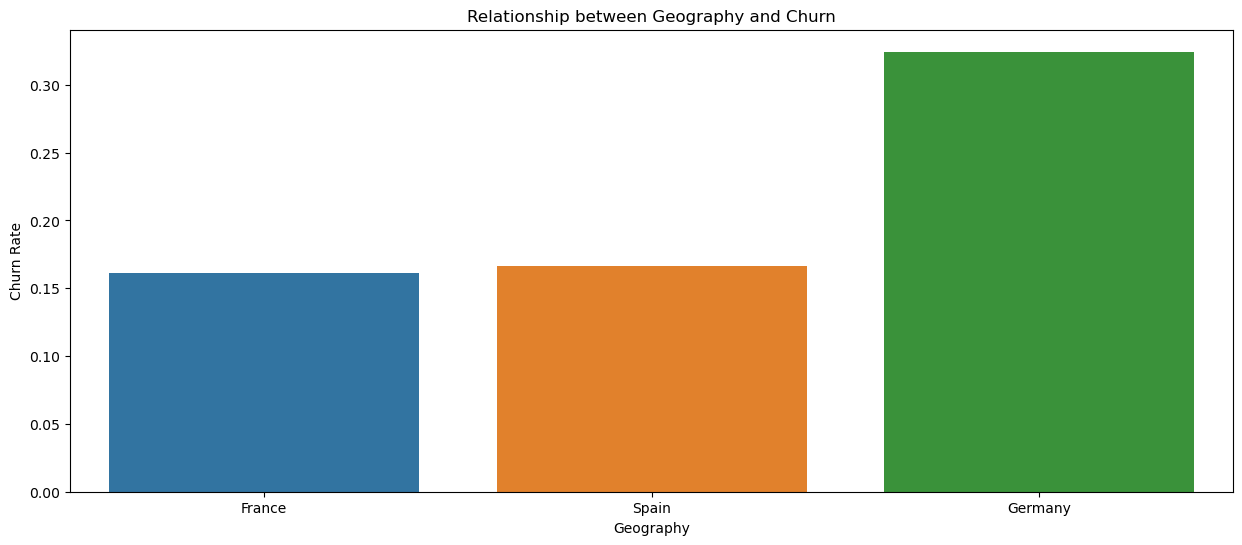

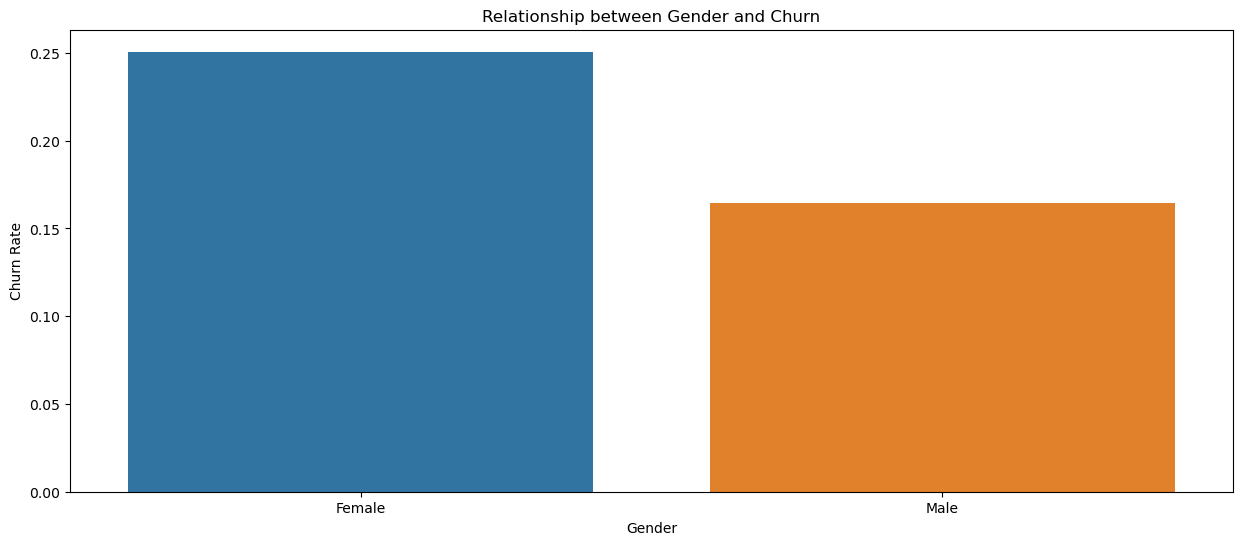

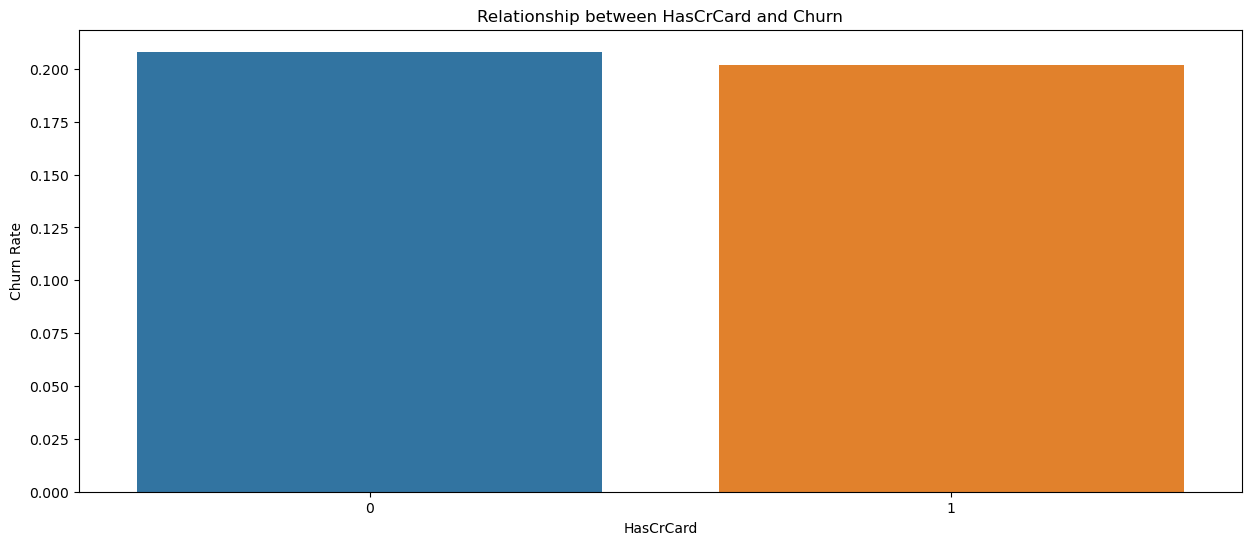

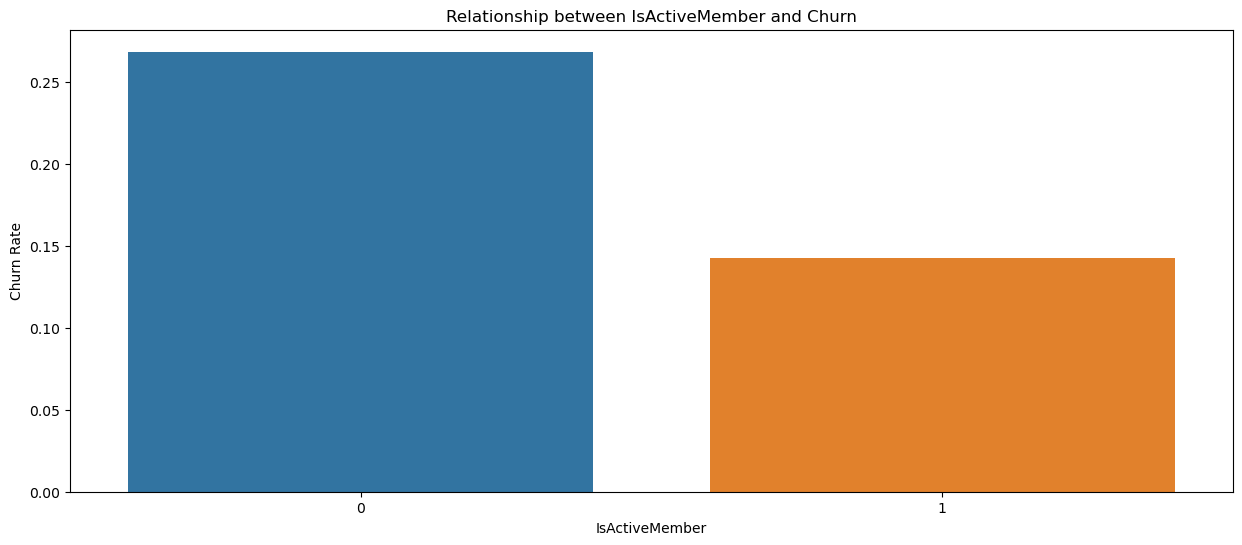

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your DataFrame is named 'df' and contains the target variable 'Exited'

# List of columns for which to plot the relationship with churn
columns_to_plot = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

for col in columns_to_plot:
    plt.figure(figsize=(15, 6))
    sns.barplot(x=col, y='Exited', data=df, ci=None)
    plt.title(f'Relationship between {col} and Churn')
    plt.ylabel('Churn Rate')
    plt.xlabel(col)
    plt.show()


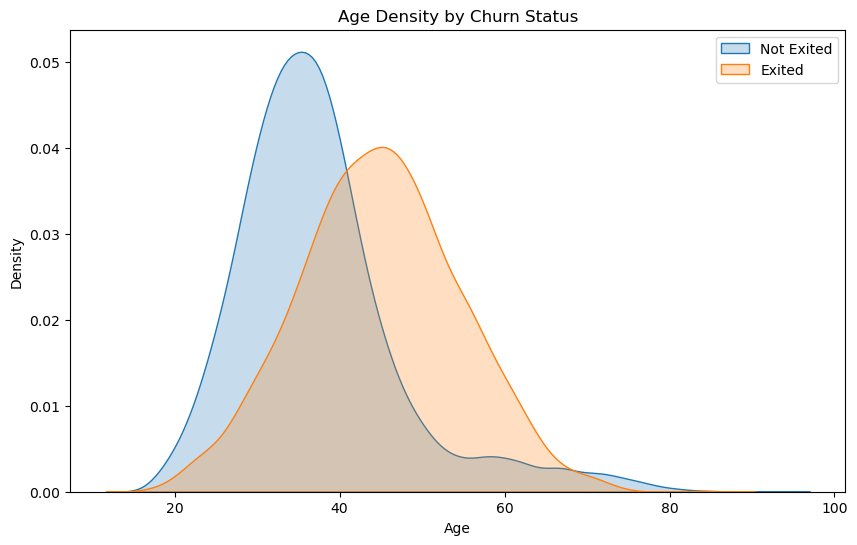

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Exited'] == 0]['Age'], label='Not Exited', shade=True)
sns.kdeplot(df[df['Exited'] == 1]['Age'], label='Exited', shade=True)
plt.title('Age Density by Churn Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


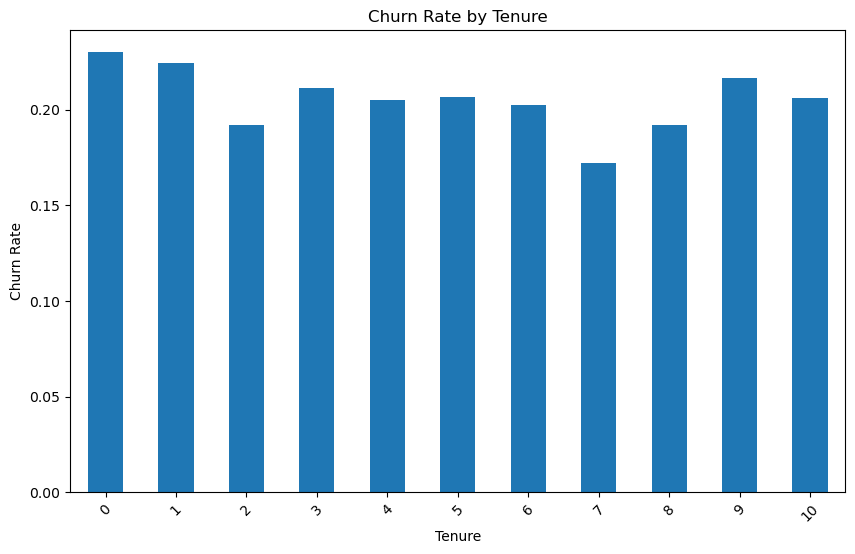

In [24]:
# Calculate churn rate by tenure
churn_rate_by_tenure = df.groupby('Tenure')['Exited'].mean()

# Plotting
plt.figure(figsize=(10, 6))
churn_rate_by_tenure.plot(kind='bar')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


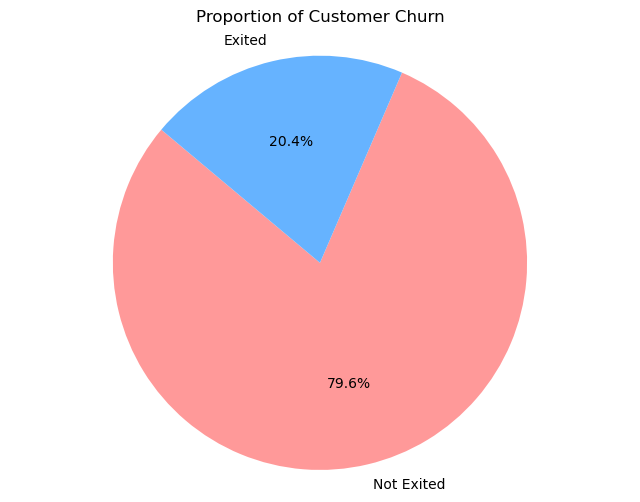

In [30]:
churn_counts = df['Exited'].value_counts()
labels = 'Not Exited', 'Exited'
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Customer Churn')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


In [31]:
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
jitter             0
dtype: int64


In [32]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [33]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'])


In [34]:
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,jitter,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.934030,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,-0.040696,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.956594,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.105513,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,-0.055043,0,0,1,1,0


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,jitter,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0.934030,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,-0.040696,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0.956594,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,0.105513,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,-0.055043,0,0,1,1,0


In [36]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
from sklearn.metrics import accuracy_score, classification_report

predictions = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions)}')



Accuracy: 1.0


In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



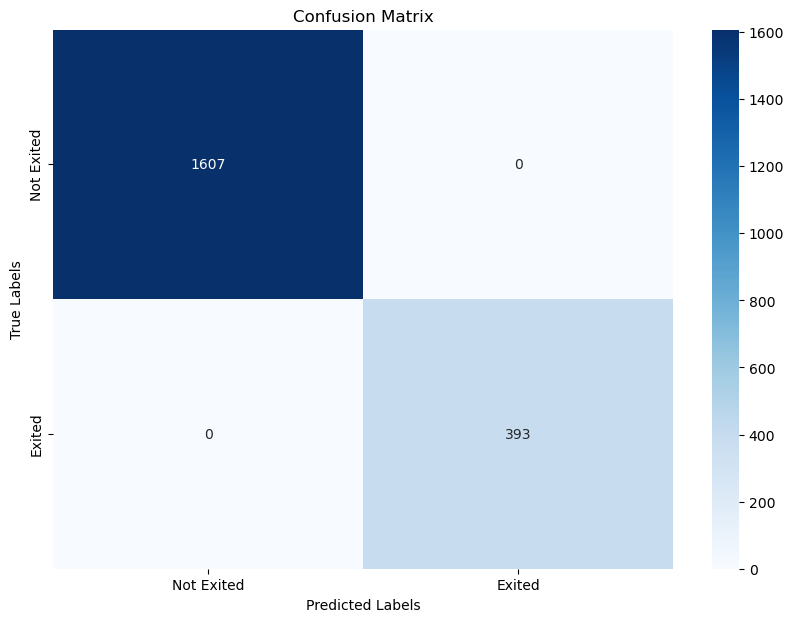

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you've already trained your model and made predictions
predictions = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 1.0
Confusion Matrix:
[[1607    0]
 [   0  393]]


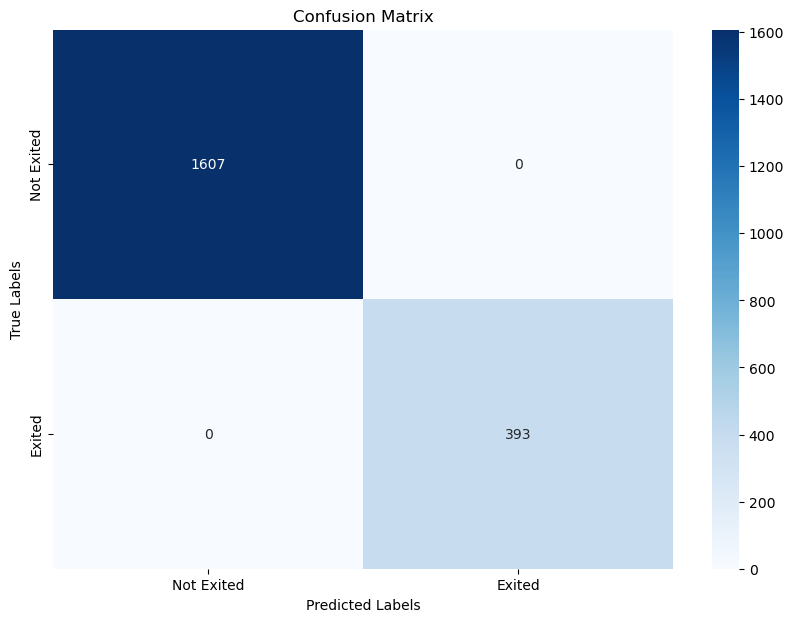

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you've already trained your model and made predictions
predictions = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [44]:
from sklearn.model_selection import cross_val_score

# Assuming you have your model defined and X_train, y_train, X_test, y_test ready
# model = LogisticRegression(random_state=42, max_iter=1000)

# Perform K-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0


In [45]:
model.predict(X_test[:15])

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)